# Ola Ride Insights

The project focuses on analyzing OLA's ride-sharing data to extract meaningful insights that can enhance operational efficiency, improve customer satisfaction, and optimize business strategies.

Approach Uesd

1. Data Collection & Cleaning

2. Exploratory Data Analysis (EDA)

3. Data Visualization

4. Dashboard Creation (Power BI)

Columns in Dataset

1. Date	- The specific calendar date the ride booking was made

2. Time - The time of day the ride booking was made

3. Booking_ID - A unique identifier assigned to each ride booking

4. Booking_Status - The final status of the ride booking

5. Customer_ID - A unique identifier for the customer who made the booking

6. Vehicle_Type - The type of vehicle booked by the customer

7. Pickup_Location - The location where the ride started

8. Drop_Location	- The location where the ride ended

9. V_TAT - Vehicle Time to Arrive (or Vehicle Turn Around Time). Likely the time (in minutes or seconds) it took the vehicle to reach the pickup location

10. C_TAT	- Customer Time to Arrive (or Customer Turn Around Time). Likely the time (in minutes or seconds) the driver waited for the customer after arriving

11. Canceled_Rides_by_Customer - The reason specified if the customer canceled the ride

12. Canceled_Rides_by_Driver	The reason specified if the driver canceled the ride

13. Incomplete_Rides	- Indicates whether the ride was incomplete

14. Incomplete_Rides_Reason	- The reason if the ride was incomplete

15. Booking_Value	- The total cost or value of the ride booking

16. Payment_Method - How the customer paid for the successful ride

17. Ride_Distance	The distance of the completed ride (in km)

18. Driver_Ratings	- The rating given to customer by driver

19. Customer_Rating	- The rating given to driver by customer

20. Day - The numerical day of the month

21. Month - The numerical month

22. Hour	- The hour of the day (24-hour format)

23. Day_Type	- Categorization of the day (e.g., Weekday or Weekend)

24. Time_of_Day	- Categorization of the time of day (e.g., Morning, Afternoon, Evening, Night)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
ola = pd.read_csv('/content/OLA Dataset.csv')

In [7]:
ola.head(5)

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,V_TAT,C_TAT,...,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating,Day,Month,Hour,Day_Type,Time_of_Day
0,26-07-2024,14:00:00,CNR7153255142,Canceled by Driver,CID713523,Prime Sedan,Tumkur Road,RT Nagar,0,0,...,444,NaN,0,3.9,4.0,26,7,14,Weekday,Afternoon
1,25-07-2024,22:20:00,CNR2940424040,Success,CID225428,Bike,Magadi Road,Varthur,203,30,...,158,Cash,13,4.1,4.0,25,7,22,Weekday,Night
2,30-07-2024,19:59:00,CNR2982357879,Success,CID270156,Prime SUV,Sahakar Nagar,Varthur,238,130,...,386,UPI,40,4.2,4.8,30,7,19,Weekday,Evening
3,22-07-2024,03:15:00,CNR2395710036,Canceled by Customer,CID581320,eBike,HSR Layout,Vijayanagar,0,0,...,384,NaN,0,3.9,4.0,22,7,3,Weekday,Late Night
4,02-07-2024,09:02:00,CNR1797421769,Success,CID939555,Mini,Rajajinagar,Chamarajpet,252,80,...,822,Credit Card,45,4.0,3.0,2,7,9,Weekday,Morning


In [8]:
ola.shape

(103024, 24)

In [10]:
ola.columns

Index(['Date', 'Time', 'Booking_ID', 'Booking_Status', 'Customer_ID',
       'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'V_TAT', 'C_TAT',
       'Canceled_Rides_by_Customer', 'Canceled_Rides_by_Driver',
       'Incomplete_Rides', 'Incomplete_Rides_Reason', 'Booking_Value',
       'Payment_Method', 'Ride_Distance', 'Driver_Ratings', 'Customer_Rating',
       'Day', 'Month', 'Hour', 'Day_Type', 'Time_of_Day'],
      dtype='object')

In [13]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103024 entries, 0 to 103023
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        103024 non-null  object 
 1   Time                        103024 non-null  object 
 2   Booking_ID                  103024 non-null  object 
 3   Booking_Status              103024 non-null  object 
 4   Customer_ID                 103024 non-null  object 
 5   Vehicle_Type                103024 non-null  object 
 6   Pickup_Location             103024 non-null  object 
 7   Drop_Location               103024 non-null  object 
 8   V_TAT                       103024 non-null  int64  
 9   C_TAT                       103024 non-null  int64  
 10  Canceled_Rides_by_Customer  10499 non-null   object 
 11  Canceled_Rides_by_Driver    18434 non-null   object 
 12  Incomplete_Rides            63967 non-null   object 
 13  Incomplete_Rid

In [14]:
ola.isnull().sum()

,0
Date,0
Time,0
Booking_ID,0
Booking_Status,0
Customer_ID,0
Vehicle_Type,0
Pickup_Location,0
Drop_Location,0
V_TAT,0
C_TAT,0


# Data Preprocessing

In [15]:
# Fill 'Canceled_Rides_by_Customer' with '0'
ola['Canceled_Rides_by_Customer'] = ola['Canceled_Rides_by_Customer'].fillna(0)

In [16]:
ola.isnull().sum()

,0
Date,0
Time,0
Booking_ID,0
Booking_Status,0
Customer_ID,0
Vehicle_Type,0
Pickup_Location,0
Drop_Location,0
V_TAT,0
C_TAT,0


In [17]:
# Fill 'Canceled_Rides_by_Driver' with '0'
ola['Canceled_Rides_by_Driver'] = ola['Canceled_Rides_by_Driver'].fillna(0)

In [18]:
ola.isnull().sum()

,0
Date,0
Time,0
Booking_ID,0
Booking_Status,0
Customer_ID,0
Vehicle_Type,0
Pickup_Location,0
Drop_Location,0
V_TAT,0
C_TAT,0


In [19]:
# Fill 'Canceled_Rides_by_Driver' with '0'
ola['Incomplete_Rides'] = ola['Incomplete_Rides'].fillna(0)

In [20]:
ola.isnull().sum()

,0
Date,0
Time,0
Booking_ID,0
Booking_Status,0
Customer_ID,0
Vehicle_Type,0
Pickup_Location,0
Drop_Location,0
V_TAT,0
C_TAT,0


In [22]:
# Fill 'Incomplete_Rides_Reason' with 'Not Applicable'
ola['Incomplete_Rides_Reason'] = ola['Incomplete_Rides_Reason'].fillna('Not Applicable')

In [23]:
ola.isnull().sum()

,0
Date,0
Time,0
Booking_ID,0
Booking_Status,0
Customer_ID,0
Vehicle_Type,0
Pickup_Location,0
Drop_Location,0
V_TAT,0
C_TAT,0


In [25]:
# Fill 'Payment_Method' with with 'Unknown'
ola['Payment_Method'] = ola['Payment_Method'].fillna('Unknown')

In [26]:
ola.isnull().sum()

,0
Date,0
Time,0
Booking_ID,0
Booking_Status,0
Customer_ID,0
Vehicle_Type,0
Pickup_Location,0
Drop_Location,0
V_TAT,0
C_TAT,0


# Exploratory Data Analysis (EDA)

## Univariate Analysis

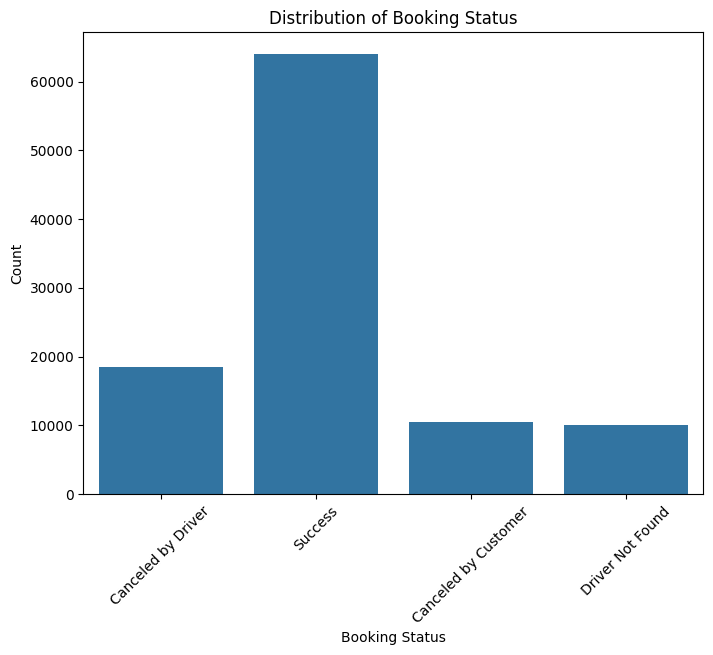

In [27]:
# Analyze the distribution of Booking Status
plt.figure(figsize=(8, 6))
sns.countplot(data=ola, x='Booking_Status')
plt.title('Distribution of Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The chart shows the distribution of Booking Status. It appears that the majority of bookings are successful, followed by rides canceled by the driver and then by the customer. There are also a smaller number of incomplete rides

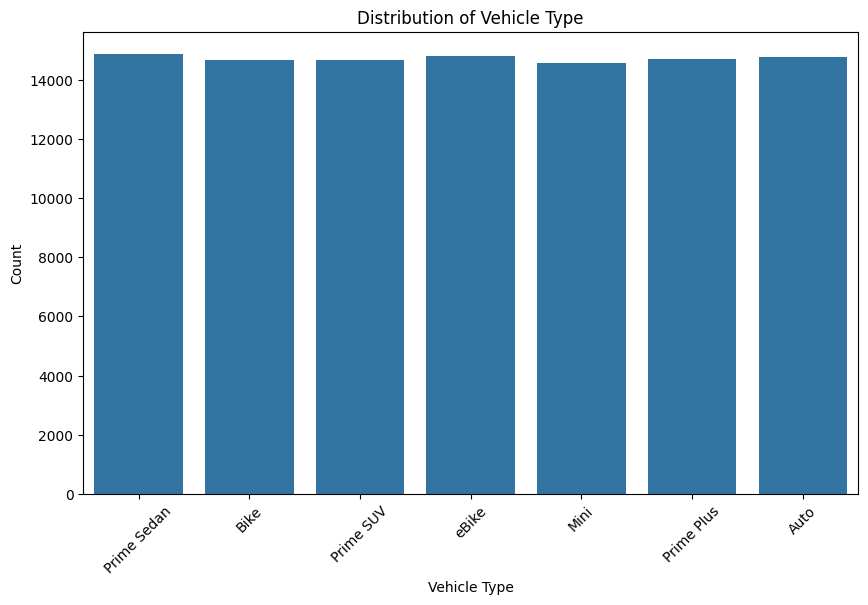

In [28]:
# Analyze the distribution of Vehicle Type
plt.figure(figsize=(10, 6))
sns.countplot(data=ola, x='Vehicle_Type')
plt.title('Distribution of Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The chart displays the distribution of vehicle types.  it appears that Prime Sedan has the highest count, followed by eBike, and then Mini.

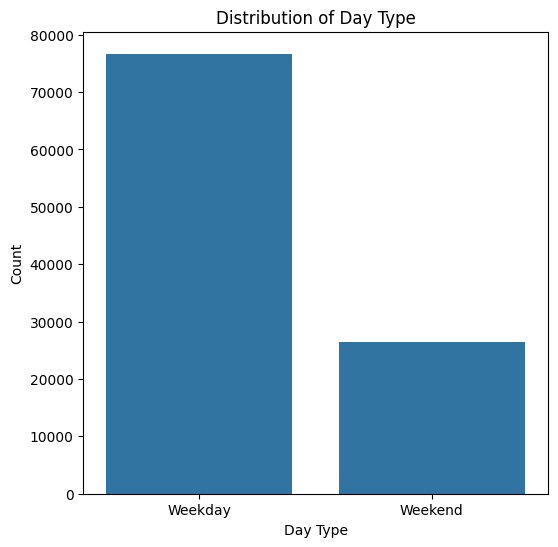

In [30]:
# Analyze the distribution of Day Type
plt.figure(figsize=(6, 6))
sns.countplot(data=ola, x='Day_Type')
plt.title('Distribution of Day Type')
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.show()

The chart shows the distribution of Day Type. It indicates that there are significantly more bookings on weekdays compared to weekends.

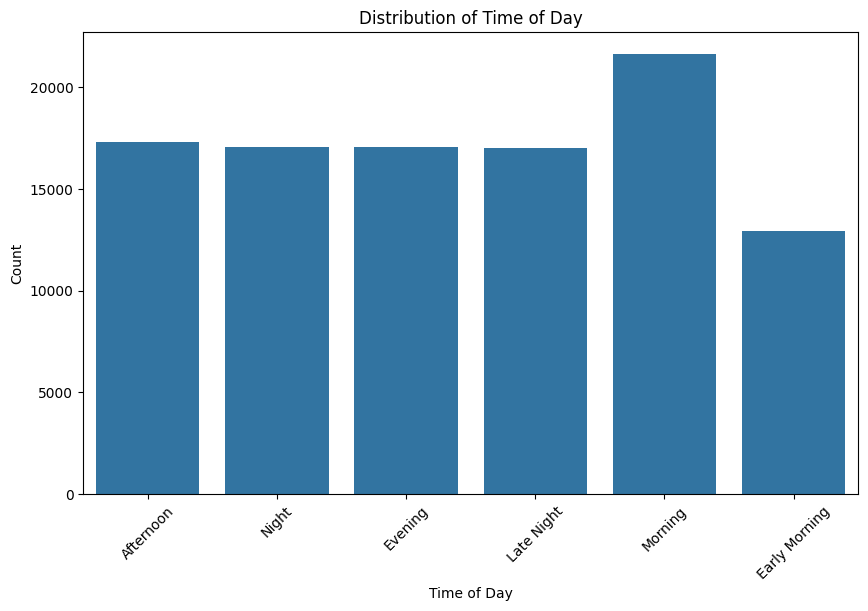

In [33]:
# Analyze the distribution of Time of Day
plt.figure(figsize=(10, 6))
sns.countplot(data=ola, x='Time_of_Day')
plt.title('Distribution of Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The chart shows Distribution of time of day, Morning has the highest number of bookings, followed by Afternoon and Evening, and then Night and Late Night

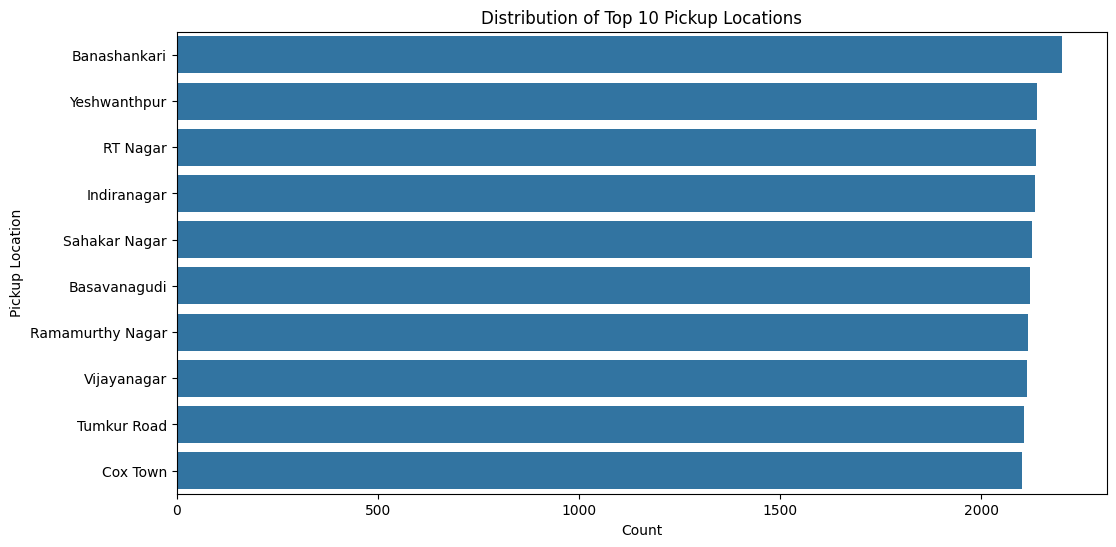

In [34]:
# Analyze the distribution of top Pickup Locations
plt.figure(figsize=(12, 6))
sns.countplot(data=ola, y='Pickup_Location', order=ola['Pickup_Location'].value_counts().index[:10])
plt.title('Distribution of Top 10 Pickup Locations')
plt.xlabel('Count')
plt.ylabel('Pickup Location')
plt.show()

The chart of the top 10 pickup locations, 'Banashankari' has the highest count followed by 'Yeshwanthpur', 'RT Nagar' and so on...

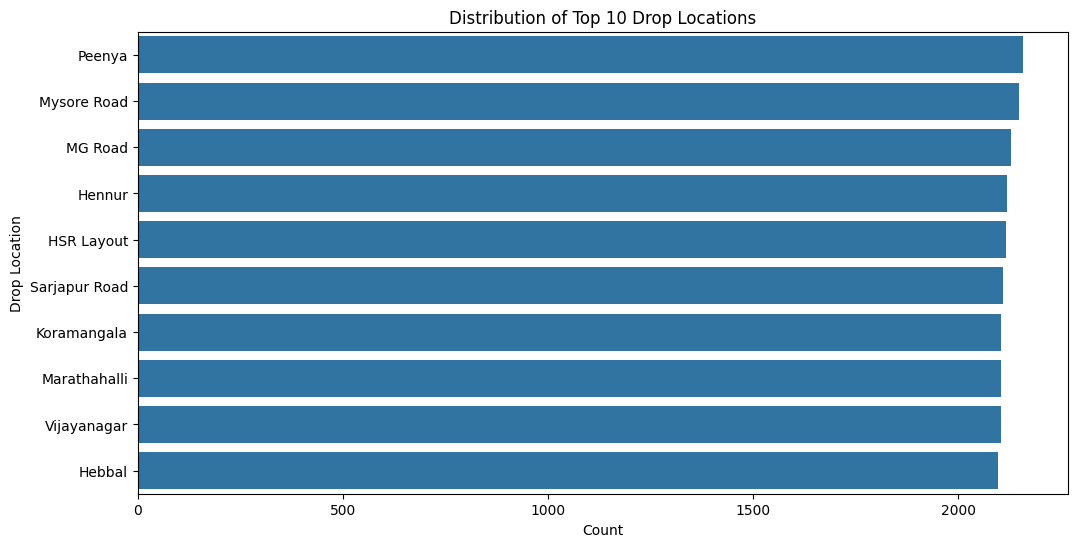

In [36]:
# Analyze the distribution of top Drop Locations
plt.figure(figsize=(12, 6))
sns.countplot(data=ola, y='Drop_Location', order=ola['Drop_Location'].value_counts().index[:10])
plt.title('Distribution of Top 10 Drop Locations')
plt.xlabel('Count')
plt.ylabel('Drop Location')
plt.show()

The chart of the top 10 drop locations shows that 'Peenya' has the highest count, followed by 'Mysore Road', 'MG Road' and so on...

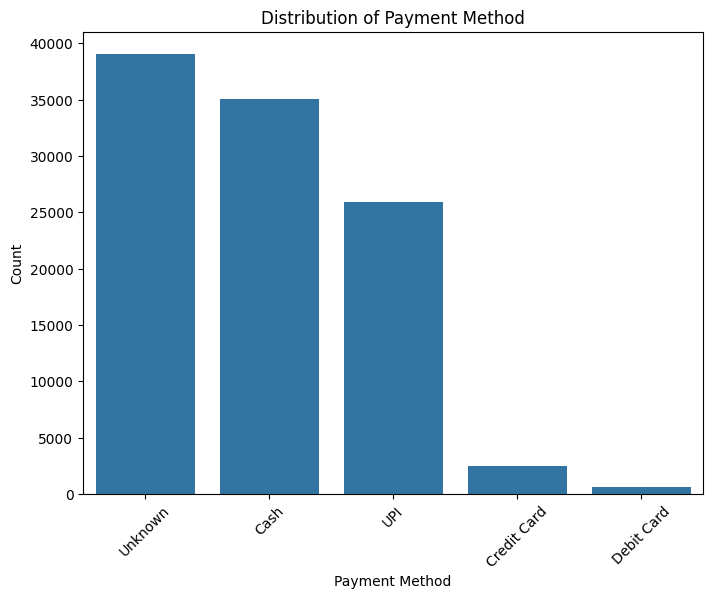

In [38]:
# Analyze the distribution of Payment Method
plt.figure(figsize=(8, 6))
sns.countplot(data=ola, x='Payment_Method')
plt.title('Distribution of Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The chart shows the distribution of payment methods. It appears that 'Cash' is the most frequently used payment method, followed by 'UPI', and then 'Credit Card'. There is also a significant number of 'Unknown' payment methods, which were likely the missing values that were filled

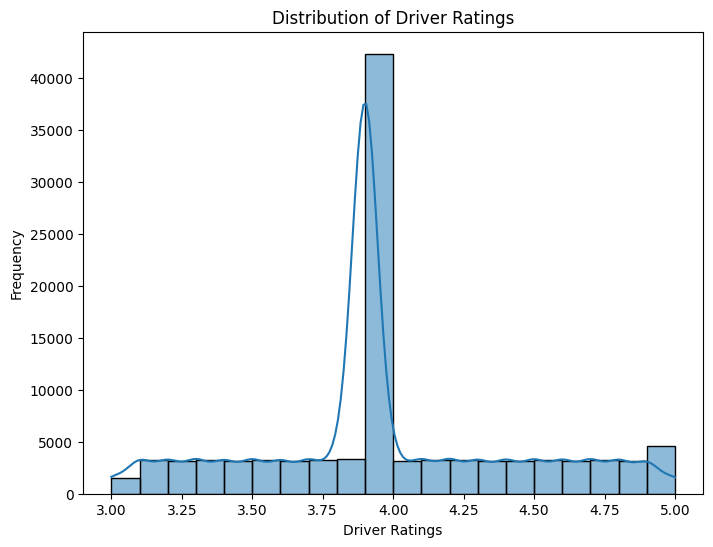

In [40]:
# Analyze the distribution of Driver Ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=ola, x='Driver_Ratings', bins=20, kde=True)
plt.title('Distribution of Driver Ratings')
plt.xlabel('Driver Ratings')
plt.ylabel('Frequency')
plt.show()

 The chart shows distribution of Driver Ratings shows a peak around 3.9, with a notable drop off after that. There's another smaller peak around 4.1, but the highest frequency is indeed around 3.9

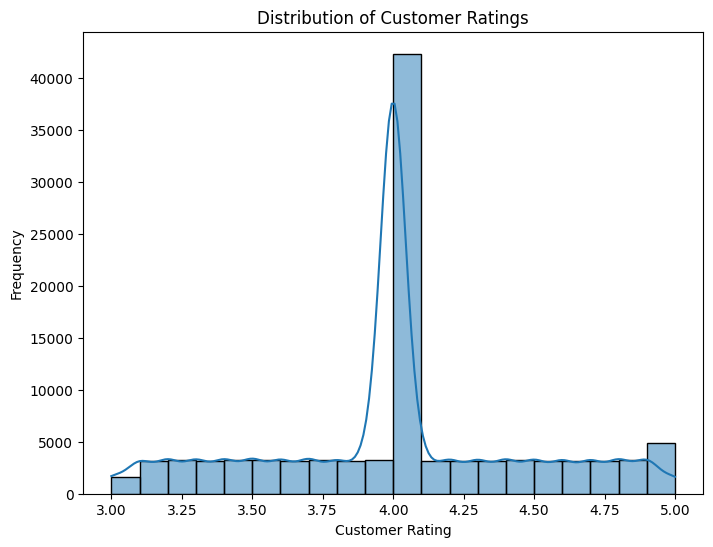

In [43]:
# Analyze the distribution of Customer Ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=ola, x='Customer_Rating', bins=20, kde=True)
plt.title('Distribution of Customer Ratings')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.show()

The chart shows distribution of Customer Ratings, there is a prominent peak at 4, after which the frequency drops off suddenly

# Bivariate analysis

# Bivariate analysis

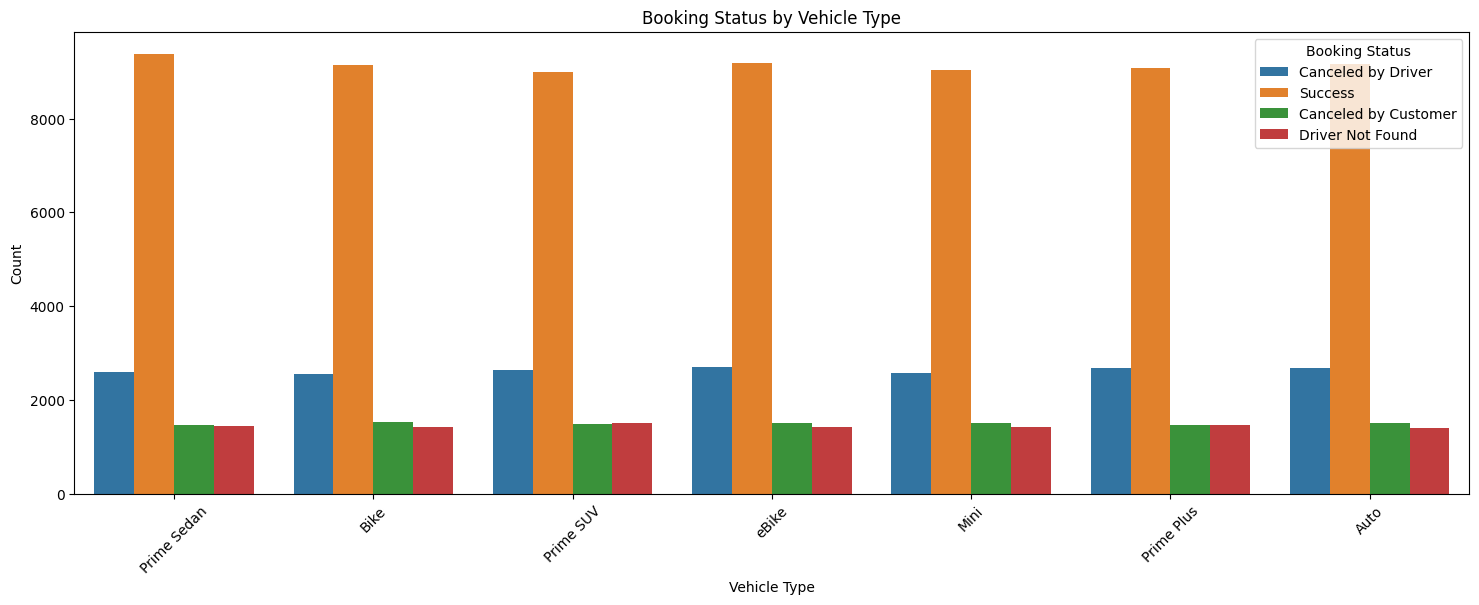

In [52]:
# Analyze the relationship between Booking Status and Vehicle Type
plt.figure(figsize=(18, 6))
sns.countplot(data=ola, x='Vehicle_Type', hue='Booking_Status')
plt.title('Booking Status by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Booking Status', loc='upper right')
plt.show()

This chart shows the booking status for each vehicle type. It appears that for all vehicle types, the majority of bookings are successful. Prime Sedans have the highest number of successful bookings overall, but they also have a significant number of cancellations by both driver and customer. eBikes seem to have a relatively lower rate of cancellations compared to the number of successful bookings

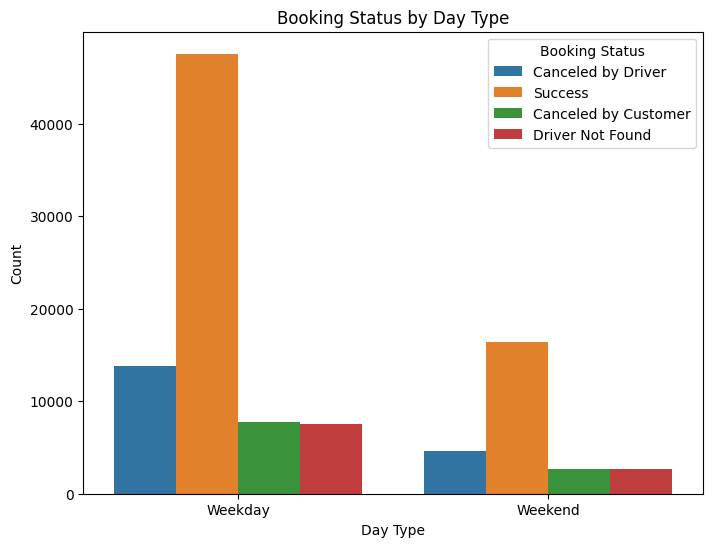

In [53]:
# Analyze the relationship between Booking Status and Day Type
plt.figure(figsize=(8, 6))
sns.countplot(data=ola, x='Day_Type', hue='Booking_Status')
plt.title('Booking Status by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.show()

This chart shows the booking status by day type. It indicates that there are more bookings on weekdays than weekends, and for both weekdays and weekends, the majority of bookings are successful. Cancellations by both drivers and customers are also higher on weekdays, likely due to the higher volume of bookings

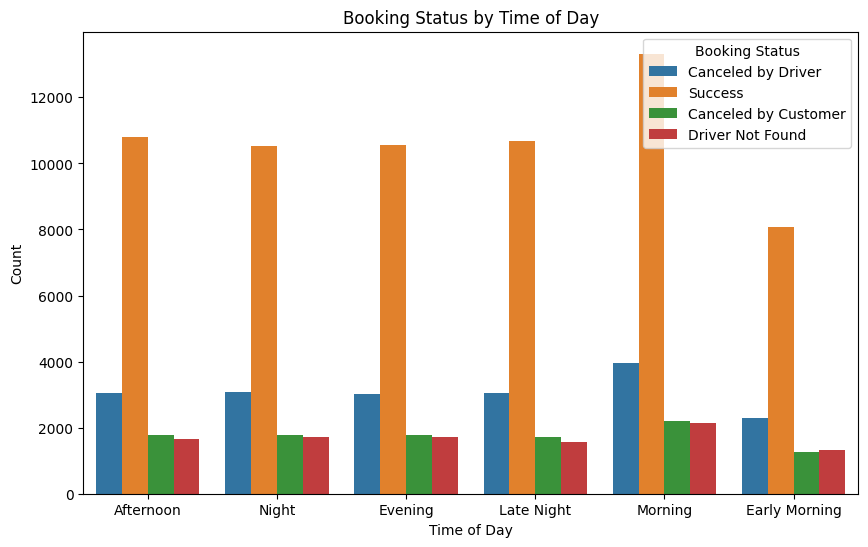

In [55]:
# Analyze the relationship between Booking Status and Time of Day
plt.figure(figsize=(10, 6))
sns.countplot(data=ola, x='Time_of_Day', hue='Booking_Status')
plt.title('Booking Status by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.show()

This chart shows the booking status by time of day. It appears that 'Morning' has the highest number of successful bookings, followed by 'Afternoon' and 'Evening'. 'Night' and 'Late Night'.  

Cancellations by the driver appear to be highest during the 'Morning' and 'Evening' time slots, while cancellations by the customer seem to be more evenly distributed throughout the day.

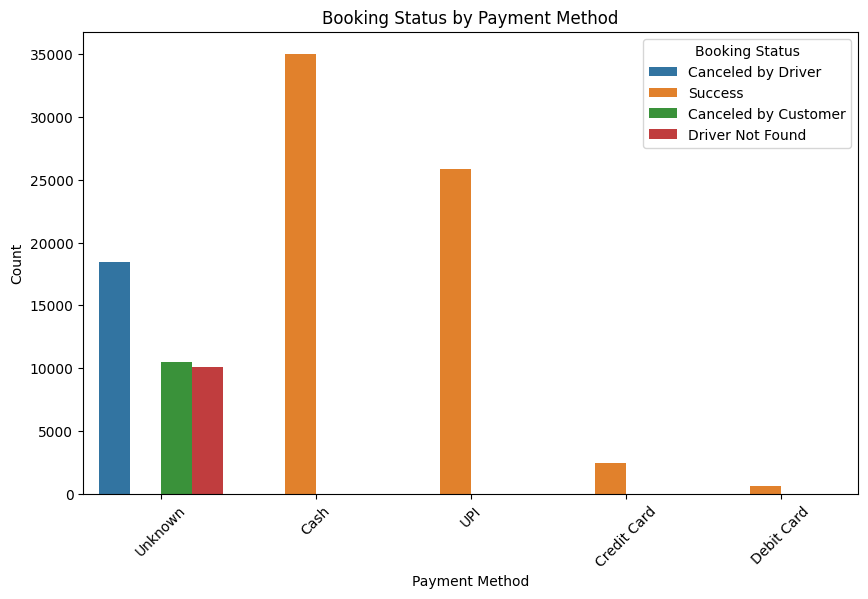

In [57]:
# Analyze the relationship between Booking Status and Payment Method
plt.figure(figsize=(10, 6))
sns.countplot(data=ola, x='Payment_Method', hue='Booking_Status')
plt.title('Booking Status by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Booking Status')
plt.show()

This chart shows the booking status by payment method. It appears that 'Cash' is the most frequently used payment method for successful bookings. 'UPI' and 'Credit Card' also have a good number of successful bookings. The 'Unknown' category, which represents the filled missing values, has a significant number of cancelled and incomplete rides, which is expected as these likely correspond to bookings where payment information was not available due to the booking not being completed successfully.

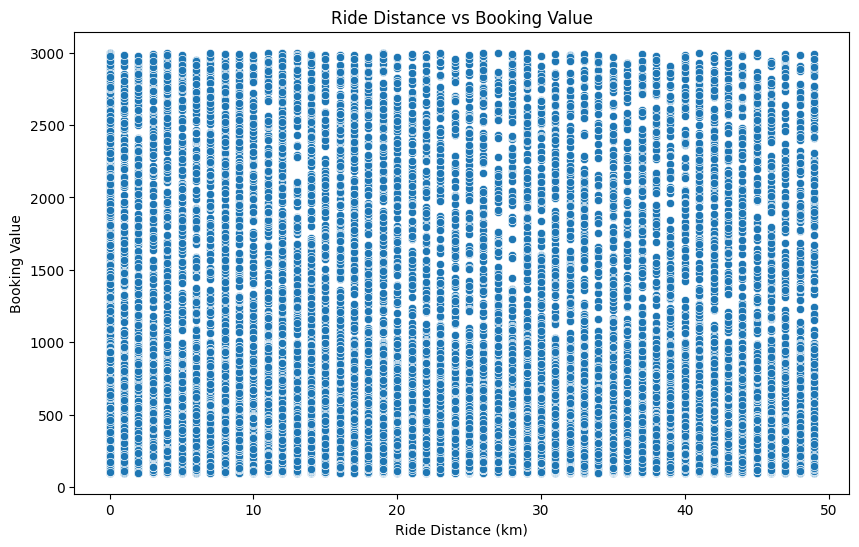

In [59]:
# Analyze the relationship between Ride Distance and Booking Value
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ola, x='Ride_Distance', y='Booking_Value')
plt.title('Ride Distance vs Booking Value')
plt.xlabel('Ride Distance (km)')
plt.ylabel('Booking Value')
plt.show()

This scatter plot shows the relationship between Ride Distance and Booking Value. It appears there is a positive correlation between ride distance and booking value, meaning that as the ride distance increases, the booking value generally also increases. However, there is also a significant spread in booking values for similar ride distances, suggesting other factors also influence the booking value

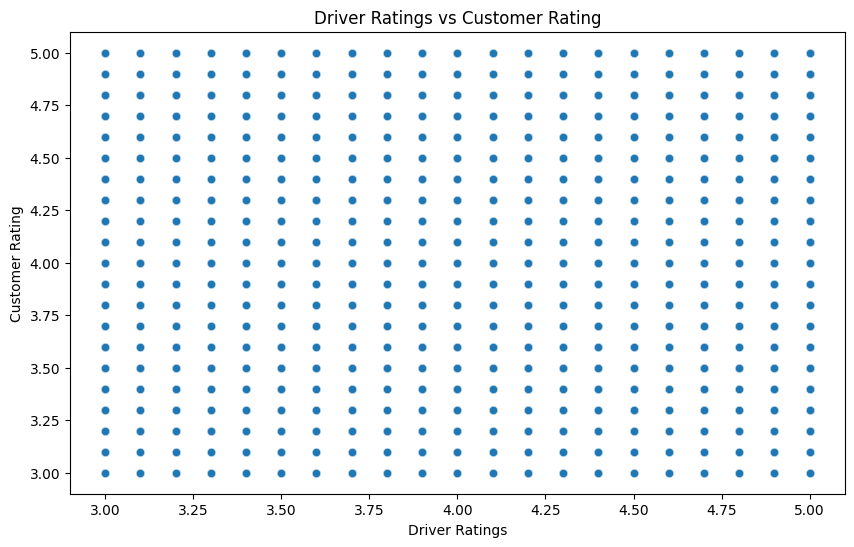

In [61]:
# Analyze the relationship between Driver Ratings and Customer Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ola, x='Driver_Ratings', y='Customer_Rating', alpha=0.5)
plt.title('Driver Ratings vs Customer Rating')
plt.xlabel('Driver Ratings')
plt.ylabel('Customer Rating')
plt.show()

This scatter plot shows the relationship between Driver Ratings and Customer Rating. It appears there isn't a strong linear correlation between driver and customer ratings. While there are clusters of ratings, particularly around the higher ends of the scale, individual driver ratings don't seem to consistently predict individual customer ratings, and vice versa. This suggests that the rating given by a driver or customer might be influenced by factors beyond just the other party's rating in a single ride.

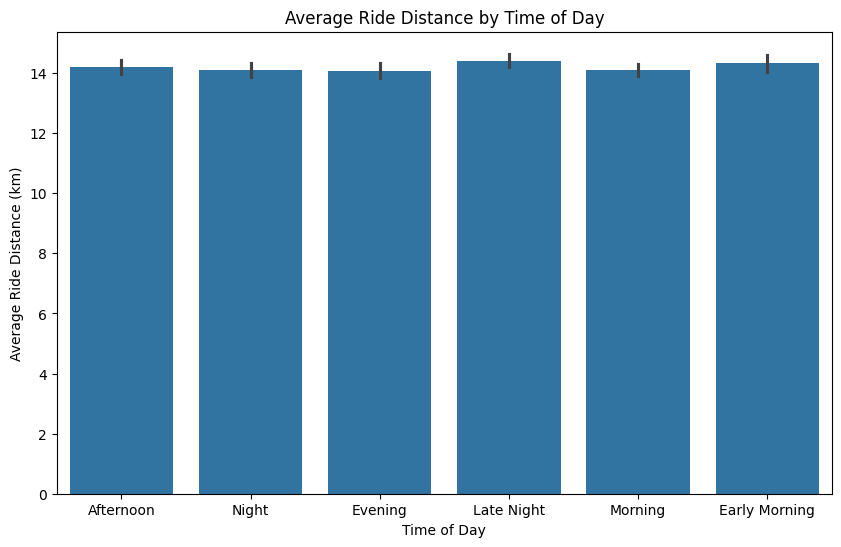

In [62]:
# Analyze the average ride distance by Time of Day
plt.figure(figsize=(10, 6))
sns.barplot(data=ola, x='Time_of_Day', y='Ride_Distance', estimator=np.mean)
plt.title('Average Ride Distance by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Ride Distance (km)')
plt.show()

This chart shows the average ride distance segmented by different times of day. The average ride distances are fairly consistent across all categories, staying close to 14 km. However, rides during Afternoon and Night appear slightly shorter compared to Early Morning and Late Night, which have marginally higher averages. This suggests that while ride distance doesn’t vary drastically by time of day, there may be a subtle trend of slightly longer trips during the early and late hours.


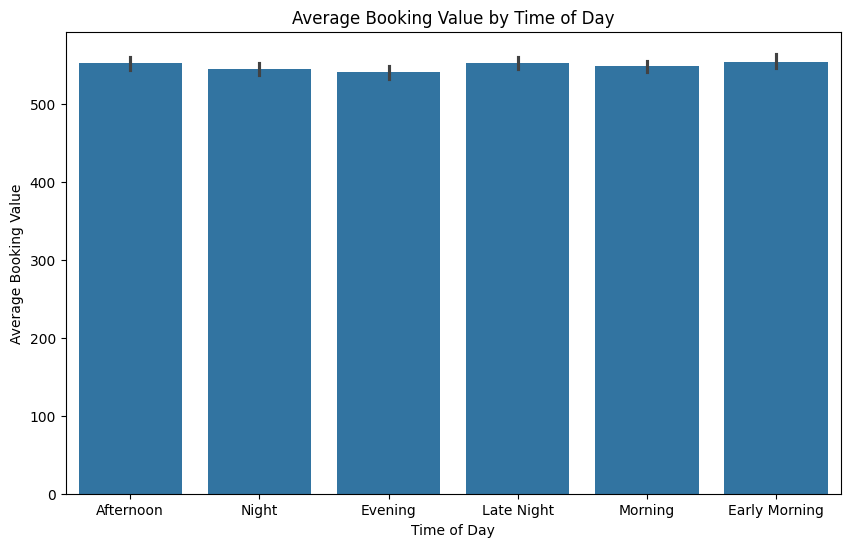

In [63]:
# Analyze the average booking value by Time of Day
plt.figure(figsize=(10, 6))
sns.barplot(data=ola, x='Time_of_Day', y='Booking_Value', estimator=np.mean)
plt.title('Average Booking Value by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Booking Value')
plt.show()

This chart shows the average booking value across different times of the day. The values remain relatively stable, averaging around ₹540–₹560 regardless of the time slot. Afternoon rides show a slightly higher average booking value, while Evening rides appear to have a marginally lower average compared to other periods. Overall, booking values are fairly consistent throughout the day, indicating that fare amounts are not significantly influenced by the time of ride.

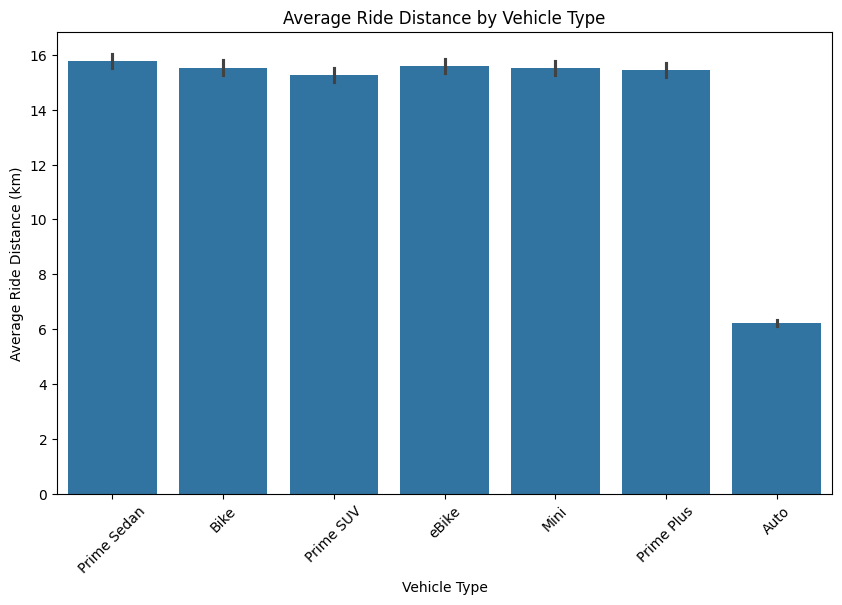

In [64]:
# Analyze the average ride distance by Vehicle Type
plt.figure(figsize=(10, 6))
sns.barplot(data=ola, x='Vehicle_Type', y='Ride_Distance', estimator=np.mean)
plt.title('Average Ride Distance by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Ride Distance (km)')
plt.xticks(rotation=45)
plt.show()

This chart illustrates the average ride distance by vehicle type. Most vehicle categories—such as Prime Sedan, Bike, Prime SUV, Mini, eBike, and Prime Plus—show similar average ride distances of around 15–16 km. However, Auto rides stand out with a much shorter average distance (around 6 km). This suggests that customers typically choose autos for shorter, local commutes, while other vehicle types are preferred for longer trips

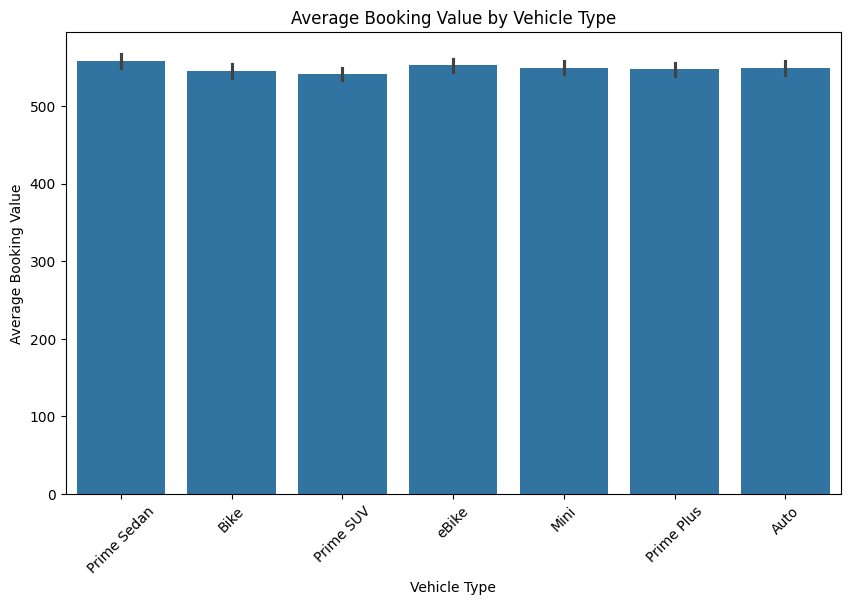

In [65]:
# Analyze the average booking value by Vehicle Type
plt.figure(figsize=(10, 6))
sns.barplot(data=ola, x='Vehicle_Type', y='Booking_Value', estimator=np.mean)
plt.title('Average Booking Value by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Booking Value')
plt.xticks(rotation=45)
plt.show()

This chart illustrates the average booking value by vehicle type. Prime Sedan has the highest average booking value, followed closely by eBikes, Mini, Prime Plus, and Auto, which show very similar values. Bikes and Prime SUVs have slightly lower average booking values compared to others, though the differences are minimal overall. The booking values across all vehicle types are relatively close, suggesting consistent pricing or ride patterns across these categories.

# Multi Variate Analysis

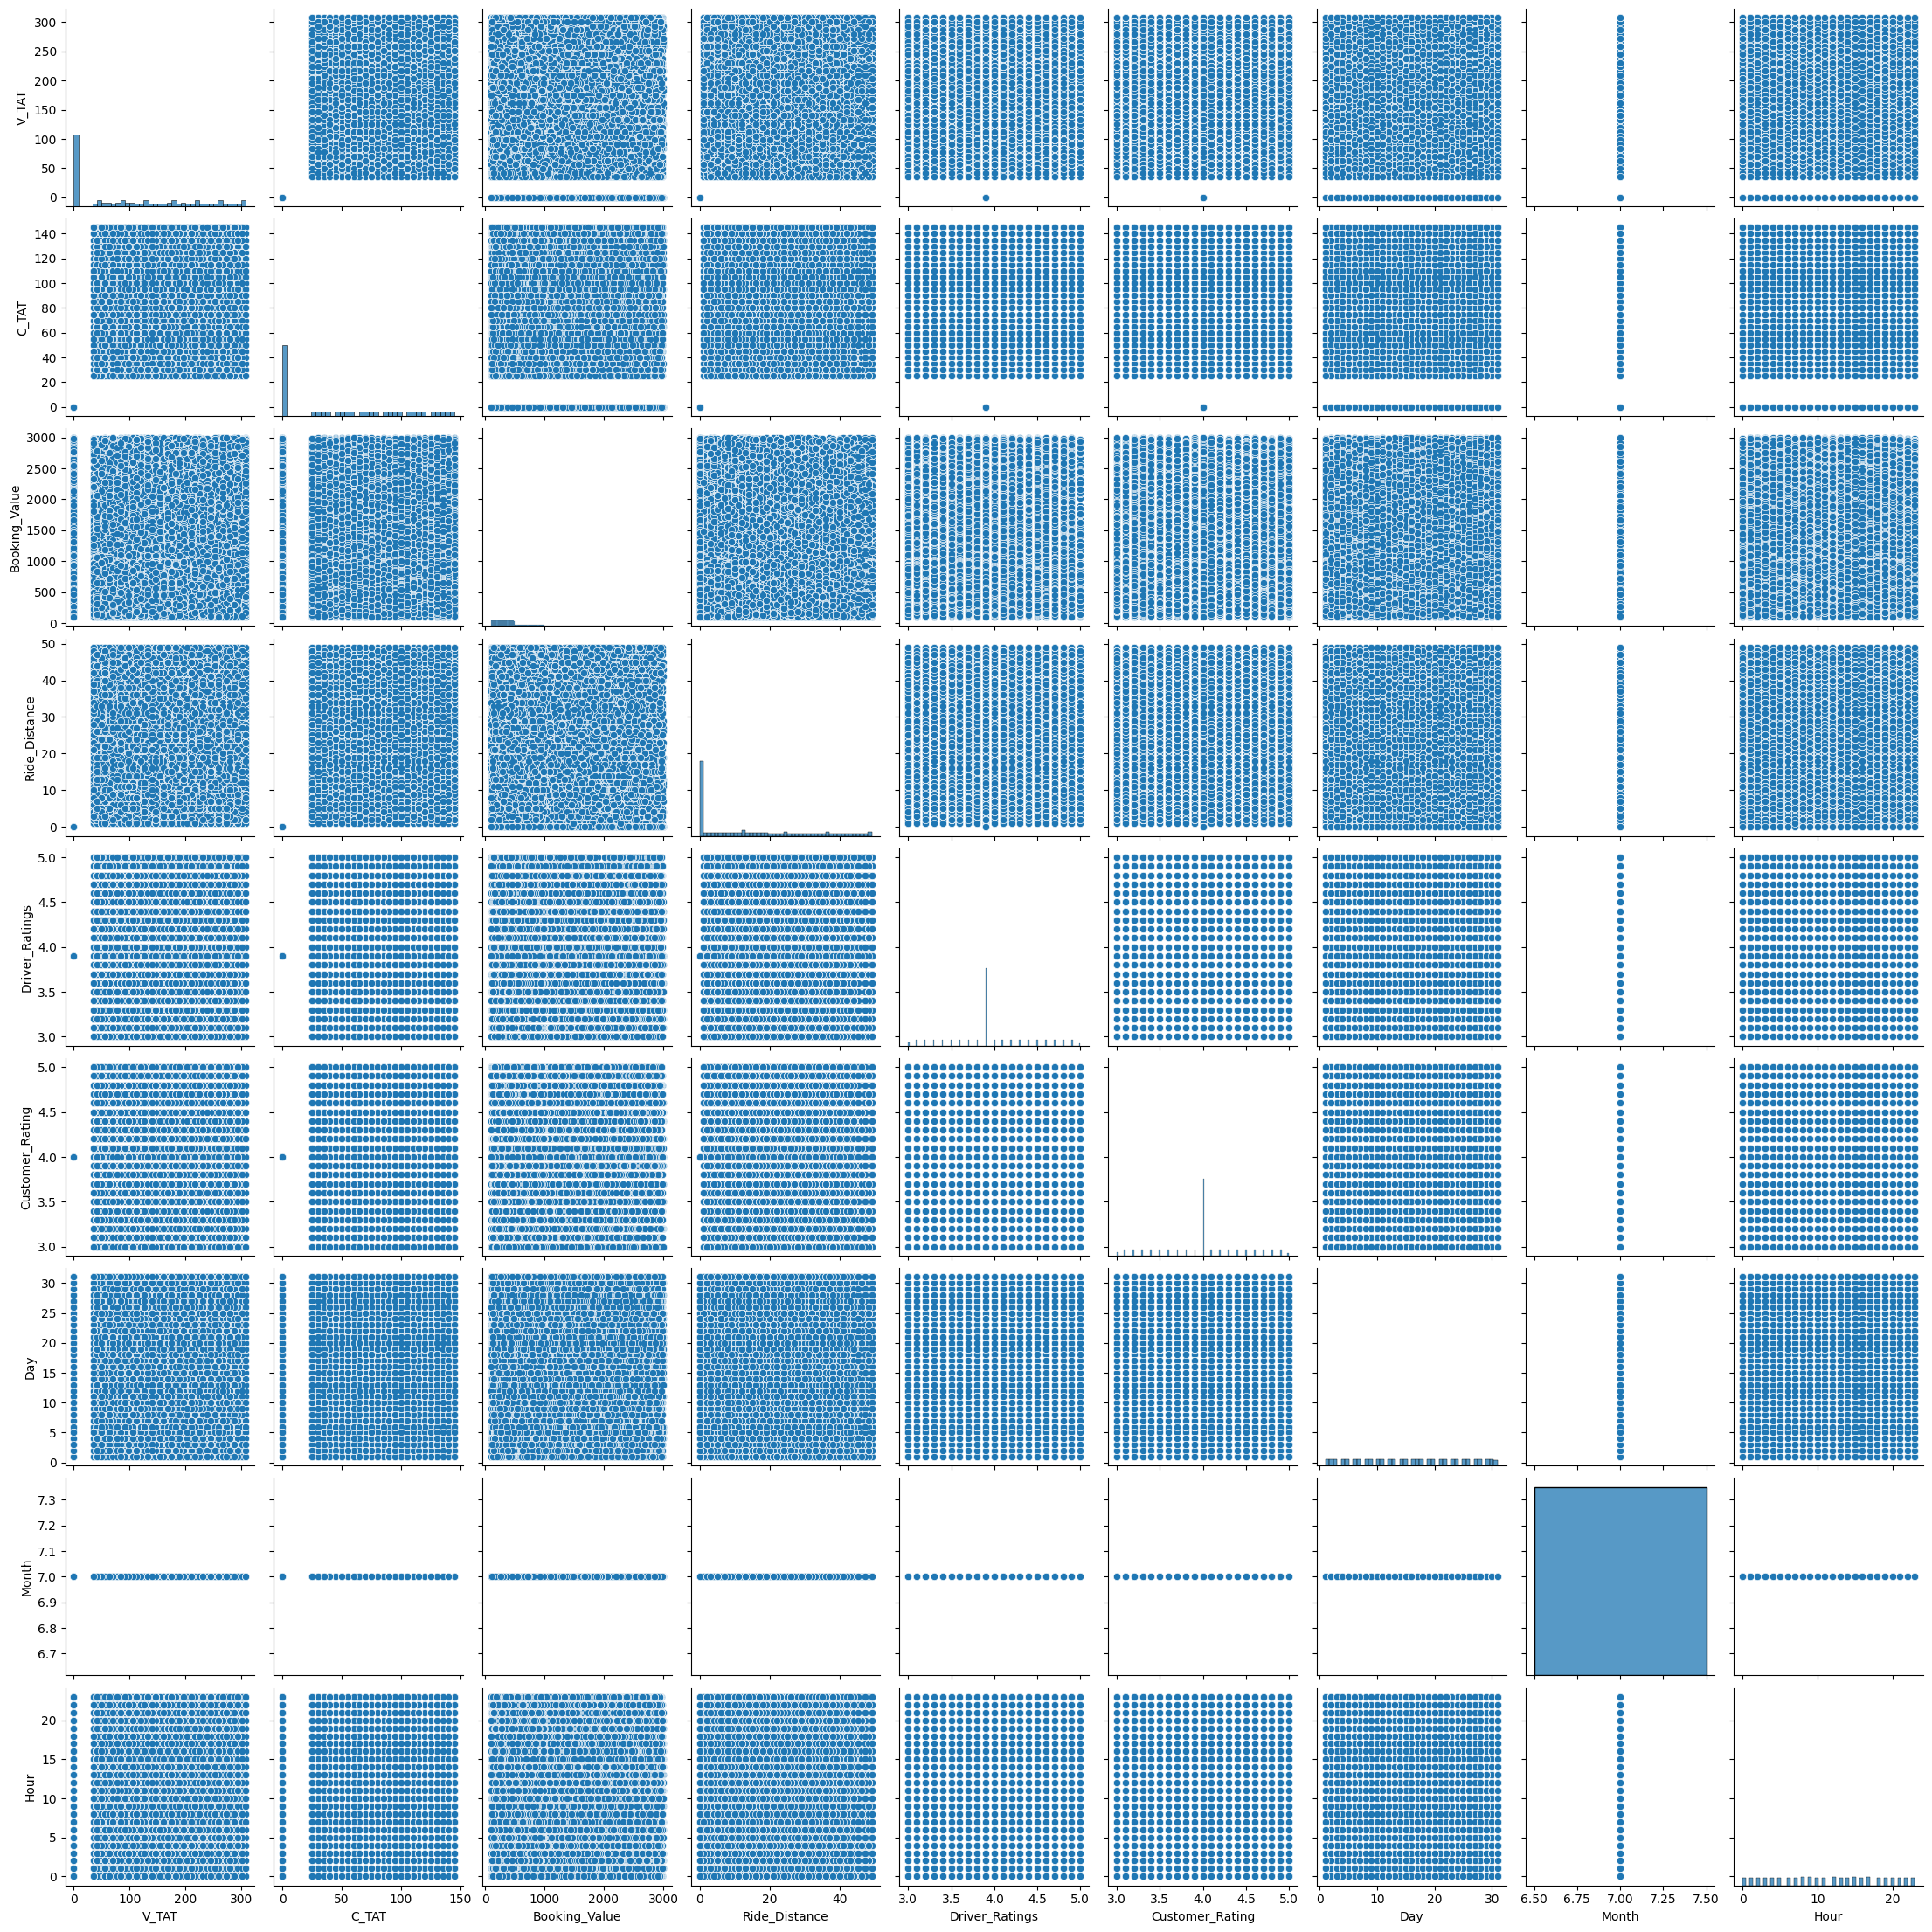

In [66]:
sns.pairplot(ola)
plt.show()

The pair plot displays scatter plots for every combination of numerical variables in the dataset, as well as histograms for each individual numerical variable along the diagonal. This allows us to quickly visualize potential relationships and distributions.

Ride_Distance and Booking_Value: The scatter plot between Ride_Distance and Booking_Value shows a positive correlation, indicating that as the ride distance increases, the booking value generally increases as well. This was also observed in the bivariate analysis.

Driver_Ratings and Customer_Rating: The scatter plot between Driver_Ratings and Customer_Rating does not show a strong linear correlation, as we also saw in the bivariate analysis.

Distributions of individual variables: The histograms on the diagonal show the distribution of each numerical variable. For example, we can see the distributions of V_TAT, C_TAT, Booking_Value, Ride_Distance, Driver_Ratings, Customer_Rating, Day, Month, and Hour.

This pair plot provides a quick overview of the relationships and distributions of the numerical variables in the dataset.

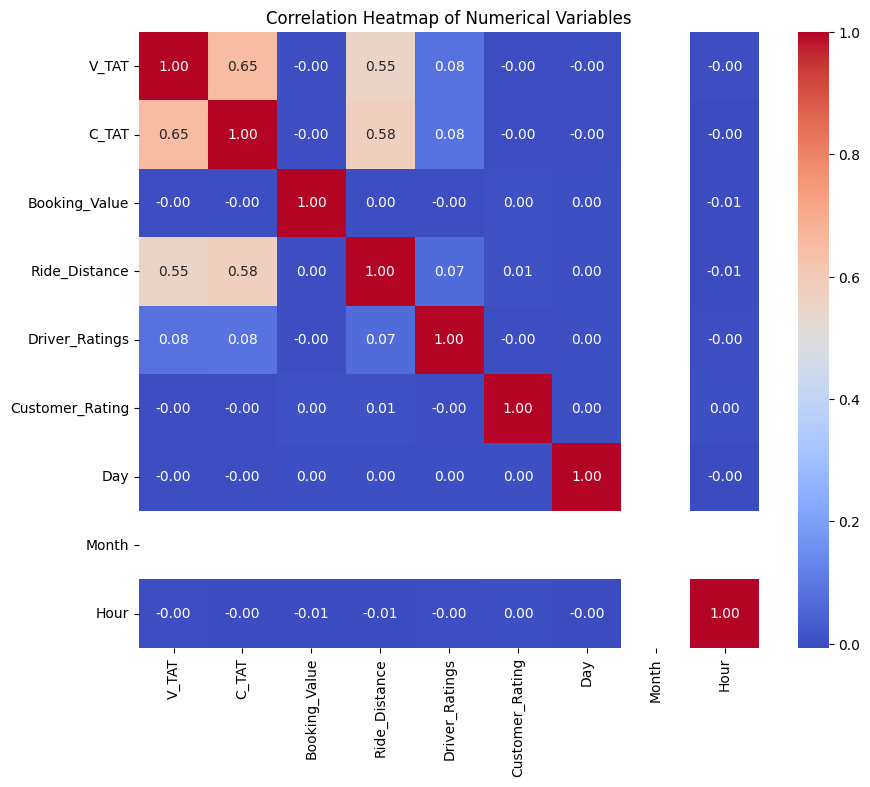

In [67]:
# Calculate the correlation matrix
correlation_matrix = ola.select_dtypes(include=np.number).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

V_TAT and C_TAT have a strong positive correlation (0.65), suggesting that vehicle and customer turnaround times tend to increase together.

Ride_Distance and V_TAT (0.55) / C_TAT (0.58) also show moderate positive correlations, indicating that longer rides generally take more turnaround time.

Booking_Value shows little to no correlation with other variables, including Ride_Distance, which might be surprising as longer rides might be expected to cost more. This suggests pricing might be flat-rate or influenced by other factors like vehicle type or surge pricing.

Driver_Ratings and Customer_Rating do not significantly correlate with any other variable, implying that user satisfaction metrics are likely influenced by more qualitative or unmeasured factors (like behavior, comfort, etc.).

**Time Variables (Day, Month, Hour)**

All time-related variables show near-zero correlation with other variables, indicating that booking values, ratings, and distances remain consistent regardless of time, day, or hour.

**Overall Summary**
While turnaround times (V_TAT and C_TAT) are correlated with ride distance, most other variables—including booking value and customer/driver ratings—appear to be largely independent. This could suggest that operational metrics and customer experience are being driven by different, possibly unmeasured, factors.

# Conclusion

# **Overall Ride Patterns**

The majority of bookings are successful, but cancellations by both drivers and customers are significant.

Prime Sedans are the most popular vehicle type, followed by eBikes and Mini cars.

Weekdays have significantly more bookings than weekends.
Early Morning and Late Night are the busiest times of the day for bookings.

# Factors Influencing Bookings and Cancellations

Booking status varies by vehicle type, with Prime Sedans having the highest volume of both successful bookings and cancellations. eBikes seem to have a lower cancellation rate relative to successful bookings.

Booking status also varies by day type and time of day, with higher volumes of both successful bookings and cancellations on weekdays and during peak hours (Morning and Evening).

The 'Unknown' payment method is associated with a significant number of cancelled and incomplete rides, which is expected as payment information is likely not available for unsuccessful bookings

There is a positive correlation between Ride_Distance and Booking_Value, indicating that longer rides generally cost more.
However, other factors also influence the booking value.

V_TAT and C_TAT are positively correlated with each other and with Ride_Distance, suggesting that longer rides and increased turnaround times are related.

Driver and Customer Ratings do not show a strong linear correlation with each other or with other numerical variables, suggesting that these ratings are influenced by factors beyond those captured in the dataset.

# Average Ride Distance and Booking Value

Average ride distances are generally consistent across most vehicle types, except for Autos which have significantly shorter average distances. This indicates that Autos are primarily used for shorter trips.

Average ride distances and booking values are higher during the 'Night' and 'Late Night' time slots, suggesting that longer and more expensive trips tend to occur during these hours.


# Limitations

The 'Month' column has limited data (likely only one month), which restricts our ability to analyze monthly trends.
The dataset contains a significant number of missing values in columns related to cancellations, incomplete rides, and payment methods, although we have filled these for the analysis. The 'Unknown' category for payment method highlights the impact of missing data on understanding payment preferences for successful vs. unsuccessful rides.